# Data

Verify that the input pipeline works as expected.

In [95]:
import os 
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import data

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
main_dir = '..'
data_dir = os.path.join(main_dir, 'image_files')
metadata = pd.read_csv('../metadata.csv')
exclude_labels = {6, 7, 8, 9}

In [97]:
sources = data.build_sources_from_metadata(metadata, data_dir, exclude_labels=exclude_labels)

In [98]:
sources[:10]

[('../image_files/10091307683230112167.JPG', 0),
 ('../image_files/15555110208252235557.JPG', 3),
 ('../image_files/8658714011390559080.JPG', 5),
 ('../image_files/8460514791644208367.JPG', 0),
 ('../image_files/10324049429817965896.JPG', 0),
 ('../image_files/13366660941511932807.JPG', 4),
 ('../image_files/2538609714180619616.JPG', 2),
 ('../image_files/12215393830460648283.JPG', 5),
 ('../image_files/12784473228480614749.JPG', 5),
 ('../image_files/9885366999726315601.JPG', 0)]

In [99]:
dataset = data.make_dataset(sources, batch_size=3)
dataset_iterator = iter(dataset)

In [100]:
def imshow_batch_of_three(batch):
    label_batch = batch[1].numpy()
    image_batch = batch[0].numpy()
    fig, axarr = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    for i in range(3):
        img = image_batch[i, ...]
        axarr[i].imshow(img)
        axarr[i].set(xlabel='label = {}'.format(label_batch[i]))

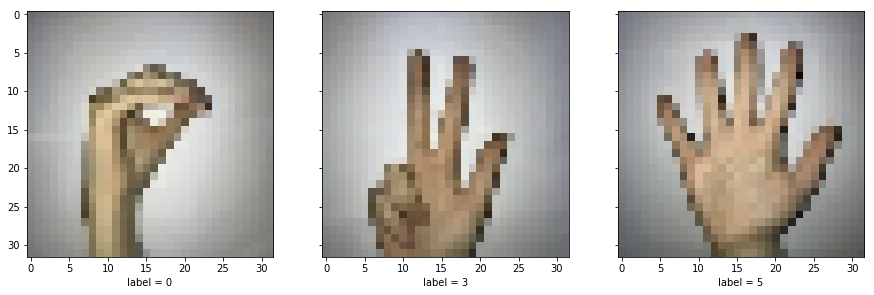

In [101]:
imshow_batch_of_three(next(dataset_iterator))